In [363]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification,make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import optuna
from optuna.samplers import GridSampler,RandomSampler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,classification_report,log_loss,roc_auc_score

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [364]:
data = pd.read_csv(r"C:\Users\saisn\Downloads\heart.csv")

In [365]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [366]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [367]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [368]:
#check the null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [369]:
#check For The Duplicates
data.duplicated().value_counts()

False    918
Name: count, dtype: int64

No duplicate rows were found in the dataset.

In [371]:
# Find The Duplicate Rows
data[data.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [372]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


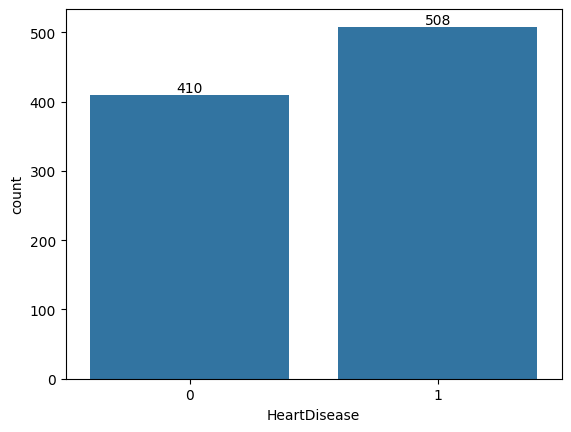

In [373]:
ax = sns.countplot(x=data['HeartDisease'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show();

In [374]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

1 (Heart Disease present) → 508 samples (≈ 55%)

0 (No Heart Disease) → 410 samples (≈ 45%)

This is mild imbalance, not severe.

A perfectly balanced dataset is 50/50.

Common threshold for serious imbalance is when one class is < 30% of the data — yours is 45%, which is acceptable but not ideal if false negatives are critical.



<Axes: xlabel='Age', ylabel='Density'>

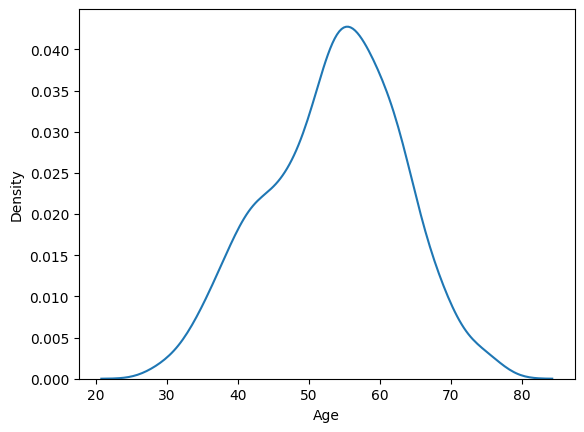

In [376]:
sns.kdeplot(x=data['Age'])

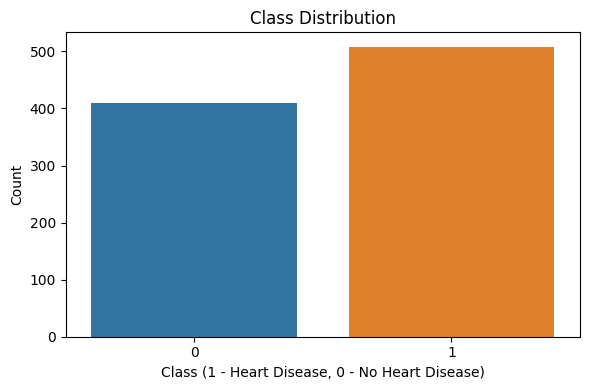

In [377]:
#Univariate Analysis

plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data, palette='tab10')
plt.title("Class Distribution")
plt.xlabel("Class (1 - Heart Disease, 0 - No Heart Disease)")
plt.ylabel("Count")
plt.tight_layout()
plt.show();

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution')

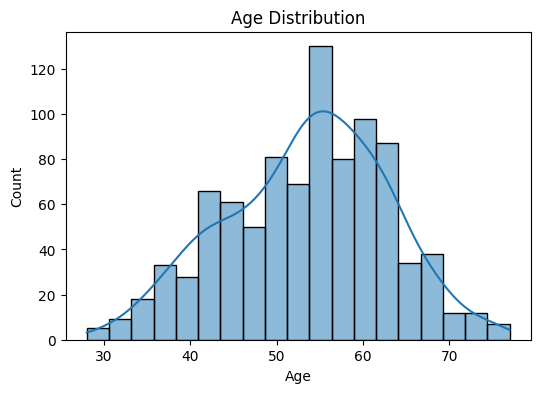

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='RestingBP', ylabel='Count'>

Text(0.5, 1.0, 'RestingBP Distribution')

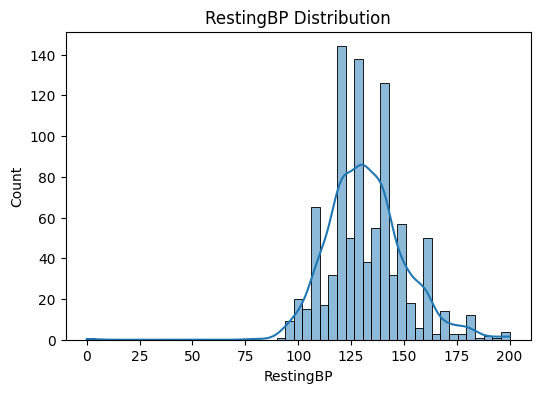

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Cholesterol', ylabel='Count'>

Text(0.5, 1.0, 'Cholesterol Distribution')

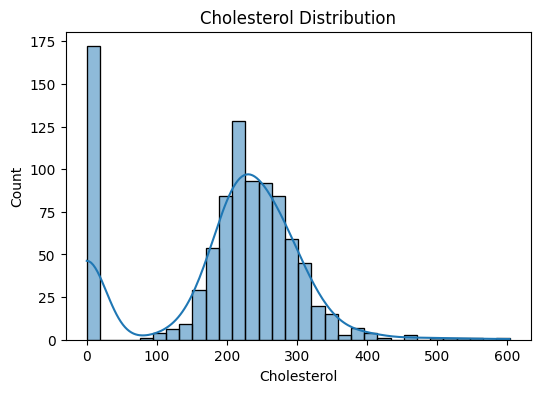

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='FastingBS', ylabel='Count'>

Text(0.5, 1.0, 'FastingBS Distribution')

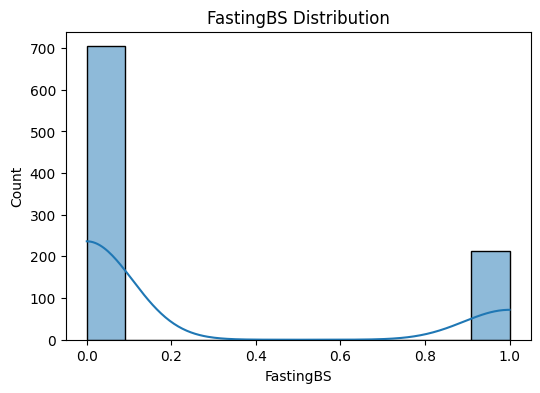

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='MaxHR', ylabel='Count'>

Text(0.5, 1.0, 'MaxHR Distribution')

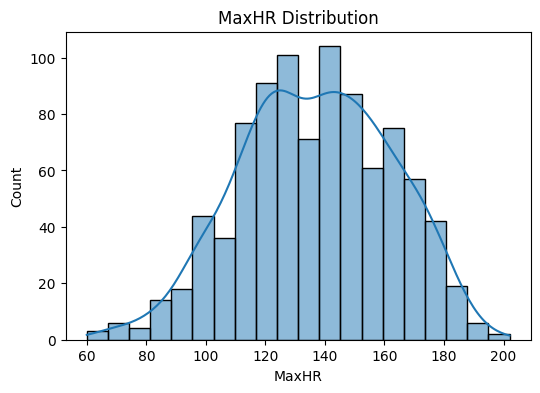

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Oldpeak', ylabel='Count'>

Text(0.5, 1.0, 'Oldpeak Distribution')

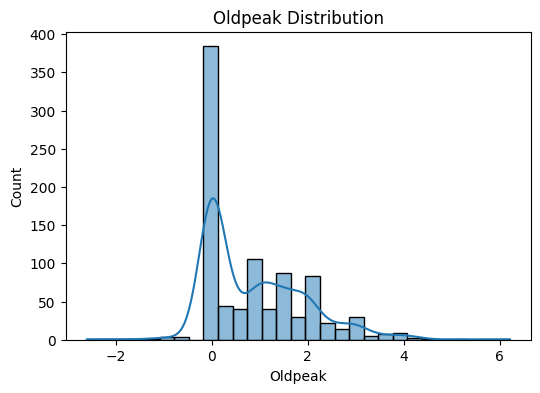

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='HeartDisease', ylabel='Count'>

Text(0.5, 1.0, 'HeartDisease Distribution')

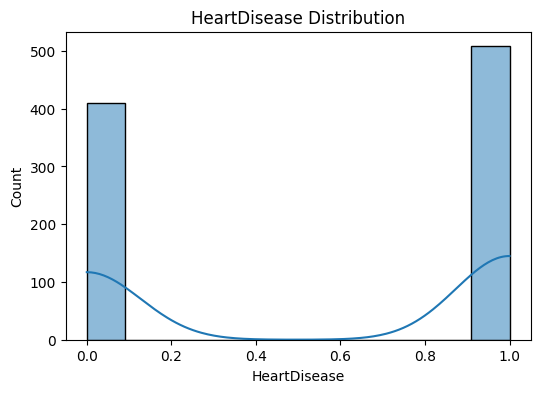

In [378]:
#Univariate Analysis for the numerical features
numerical_columns = data.select_dtypes(include='number')
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show();

In [379]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

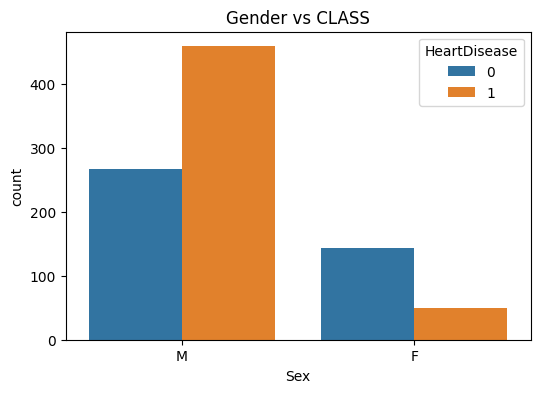

In [380]:
#Bivariate Analysis

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Gender vs CLASS')
plt.show();

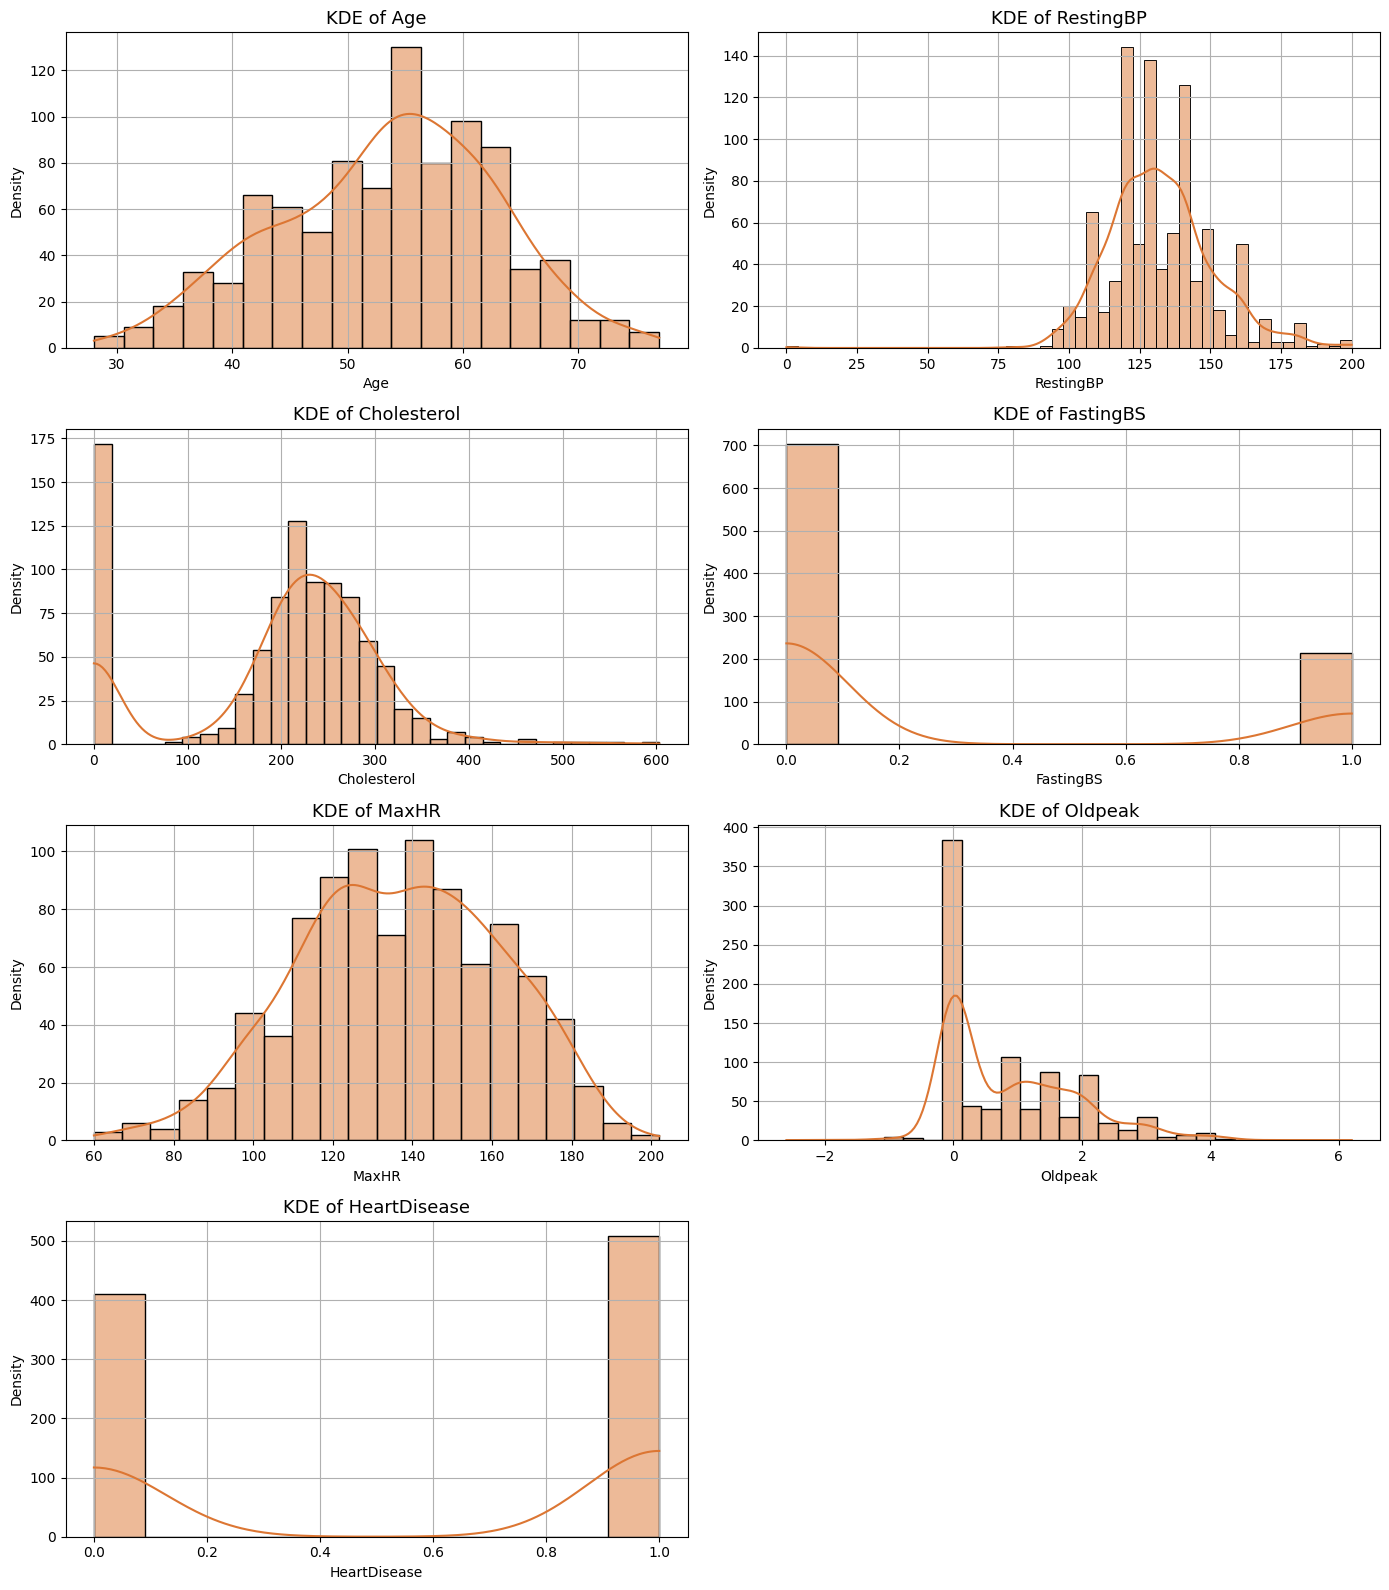

In [381]:
#KDE Plot For All Numerical Columns
#KDE PLot

numerical_cols = data.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, color='#dc7633', edgecolor='black')
    plt.title(f"KDE of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)

plt.tight_layout()
plt.show();


In [382]:
# Check for presence of Outliers in Numerical columns

# to identify the presence of outliers, check the skewness value for each numerical column 
data.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

| Feature          | Skewness | Skew Type               | Action Needed?                       |
| ---------------- | -------- | ----------------------- | ------------------------------------ |
| **Age**          | -0.1959  | Mildly left-skewed      | ❌ No action needed                   |
| **RestingBP**    | 0.1798   | Mildly right-skewed     | ❌ No action needed                   |
| **Cholesterol**  | -0.6101  | Moderately left-skewed  | ⚠️ Maybe                             |
| **FastingBS**    | 1.2645   | **Highly right-skewed** | ✅ Yes (Transform or leave if binary) |
| **MaxHR**        | -0.1444  | Mildly left-skewed      | ❌ No action needed                   |
| **Oldpeak**      | 1.0229   | **Highly right-skewed** | ✅ Yes (Transform)                    |
| **HeartDisease** | -0.2151  | Binary Target           | ❌ Ignore (target variable)           |


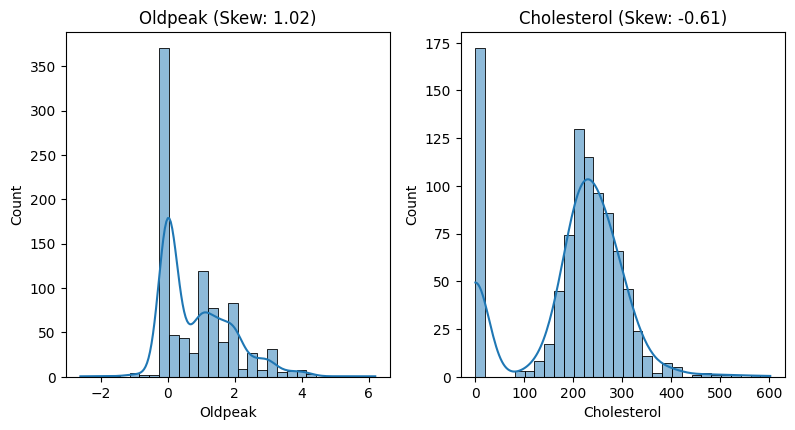

In [384]:
skewed_features = ['Oldpeak','Cholesterol']
plt.figure(figsize=(12, 8))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"{col} (Skew: {data[col].skew():.2f})")
plt.tight_layout()
plt.show();

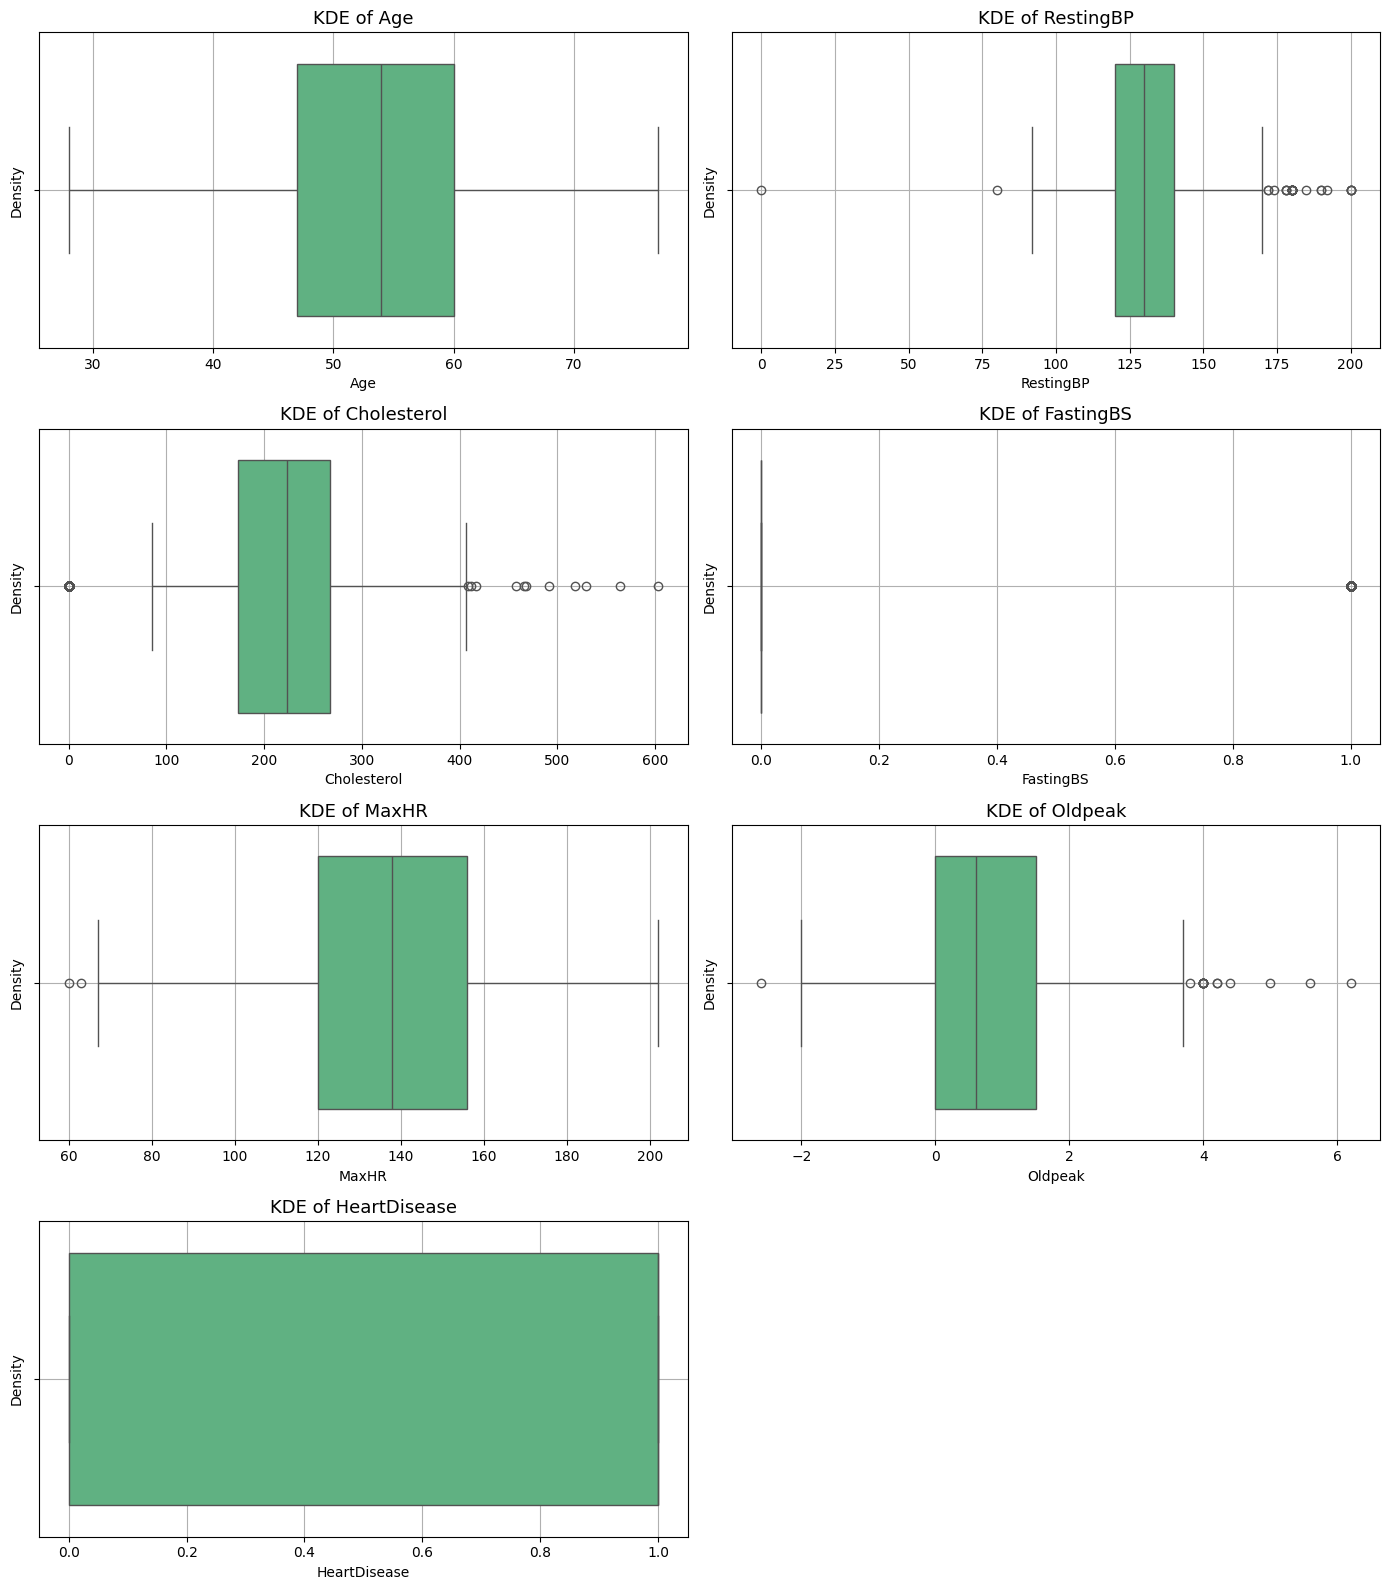

In [385]:
numerical_cols = data.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x =data[col],  color='#52be80')
    plt.title(f"KDE of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)

plt.tight_layout()
plt.show();

In [386]:
# Two approaches to get the outliers in the data
# IQR method
# Standard deviation method

# ['Urea', 'Cr', 'TG', 'HDL', 'LDL', 'VLDL']


In [387]:
# 1. Get the Outlier rows based on IQR method
q1,q2,q3 = data['Cholesterol'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1
ub= q3+1.5*iqr
lb = q1-1.5*iqr

In [388]:
q1,q2,q3,iqr,ub,lb

(173.25, 223.0, 267.0, 93.75, 407.625, 32.625)

In [389]:
# Extract the outlier rows using ub & lb 

data[(data.Cholesterol<lb) | (data.Cholesterol>ub)].shape

data[(data.Cholesterol<lb) | (data.Cholesterol>ub)]

(183, 12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [390]:
round((data[(data.Cholesterol<lb) | (data.Cholesterol>ub)].shape[0]/len(data))*100,2)

19.93

In [391]:
# Observation:
# 19.93% of observations are identified as outliers based on IQR method

In [392]:
# 2. Get the Outlier rows based on Std Dev method
mu = data.Cholesterol.mean() 
sd = data.Cholesterol.std() 
UL = mu+2*sd 
LL = mu-2*sd 
print(mu, sd, UL, LL, sep = "\n")

198.7995642701525
109.38414455220337
417.56785337455926
-19.968724834254232


In [393]:
# Extract the outlier rows using ub & lb 

data[(data.Cholesterol<LL) | (data.Cholesterol>UL)].shape

data[(data.Cholesterol<LL) | (data.Cholesterol>UL)].head() 

(8, 12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1


In [394]:
round((data[(data.Cholesterol<LL) | (data.Cholesterol>UL)].shape[0]/len(data))*100,2)

0.87

In [395]:
# Observation:
# 0.87% of observations are identified as outliers based on std dev method

In [396]:
# Exclude: IQR based approach 
data[data.Cholesterol < ub]["Cholesterol"].skew() 

# Exclude: Std Dev based approach 
data[data.Cholesterol < UL]["Cholesterol"].skew()


-0.8748827399484822

-0.8497344974459423

Use IQR-based skewness to decide whether transformation is needed.

In [398]:
data.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

<Axes: xlabel='Oldpeak'>

Text(0.5, 1.0, 'Oldpeak - Outliers')

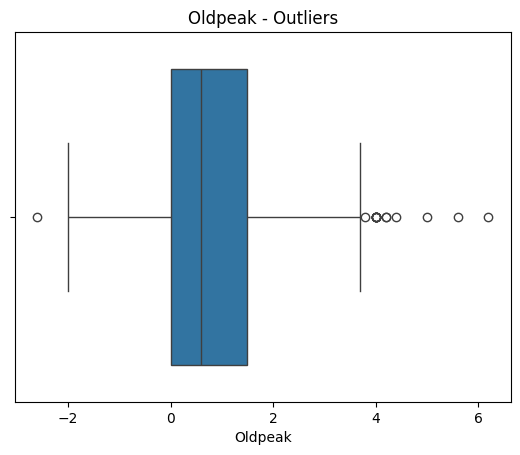

<Axes: xlabel='Cholesterol'>

Text(0.5, 1.0, 'Cholesterol - Outliers')

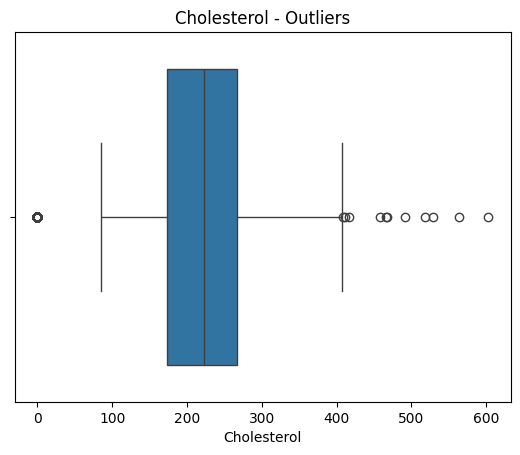

In [399]:
# Boxplot for Oldpeak
sns.boxplot(x=data['Oldpeak'])
plt.title("Oldpeak - Outliers")
plt.show()

# Boxplot for Cholesterol
sns.boxplot(x=data['Cholesterol'])
plt.title("Cholesterol - Outliers")
plt.show()

In [400]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df


In [401]:
df = cap_outliers(data, 'Oldpeak')
df = cap_outliers(data, 'Cholesterol')


In [402]:
data.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610829
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         0.816956
HeartDisease   -0.215086
dtype: float64

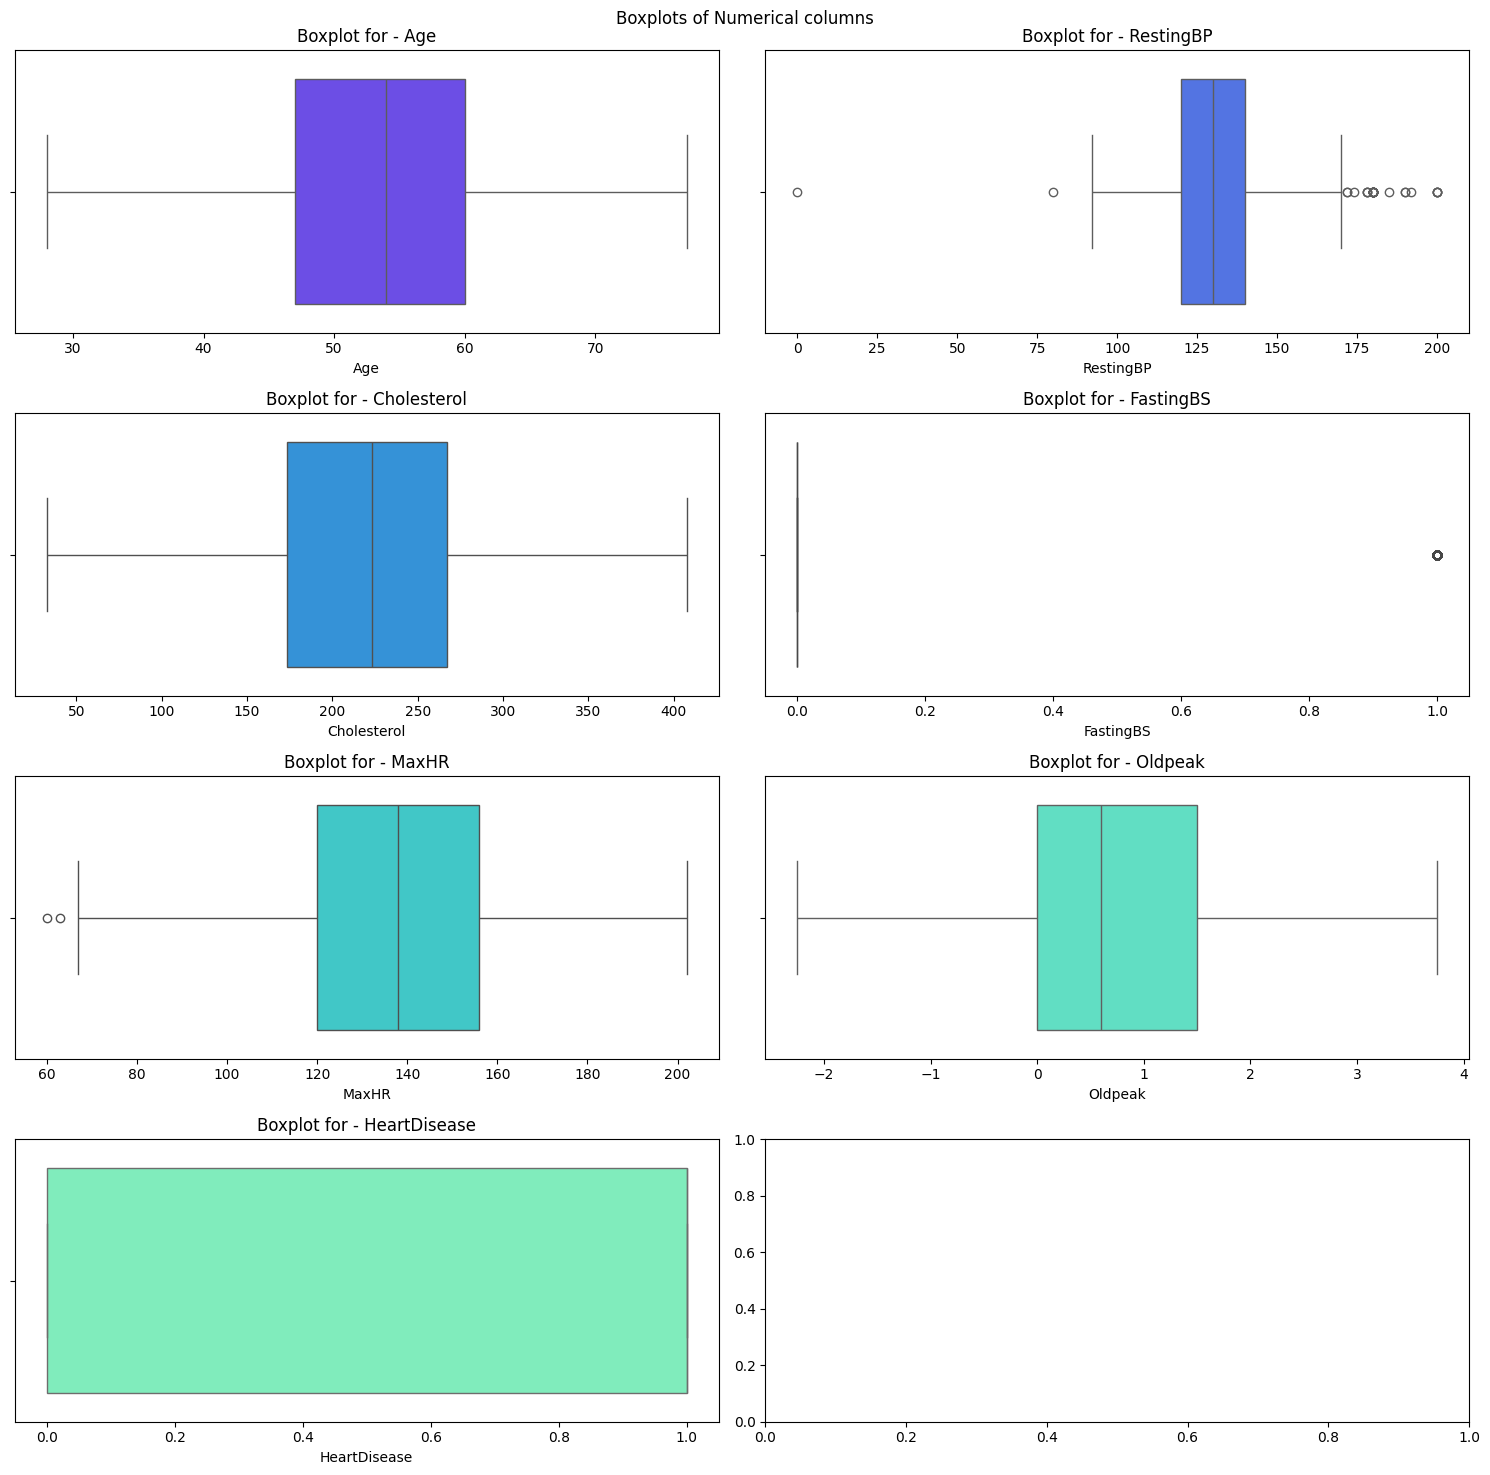

In [444]:
num_cols = data.select_dtypes(include="number").columns
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (15,15))
pos = axs.flatten() 

for i in range(len(num_cols)): 
    sns.boxplot(data=data, x = num_cols[i], ax = pos[i], color=sns.color_palette("rainbow", 14)[i])
    pos[i].set_title(f"Boxplot for - {num_cols[i]}")

plt.suptitle("Boxplots of Numerical columns")
plt.tight_layout()
plt.show();

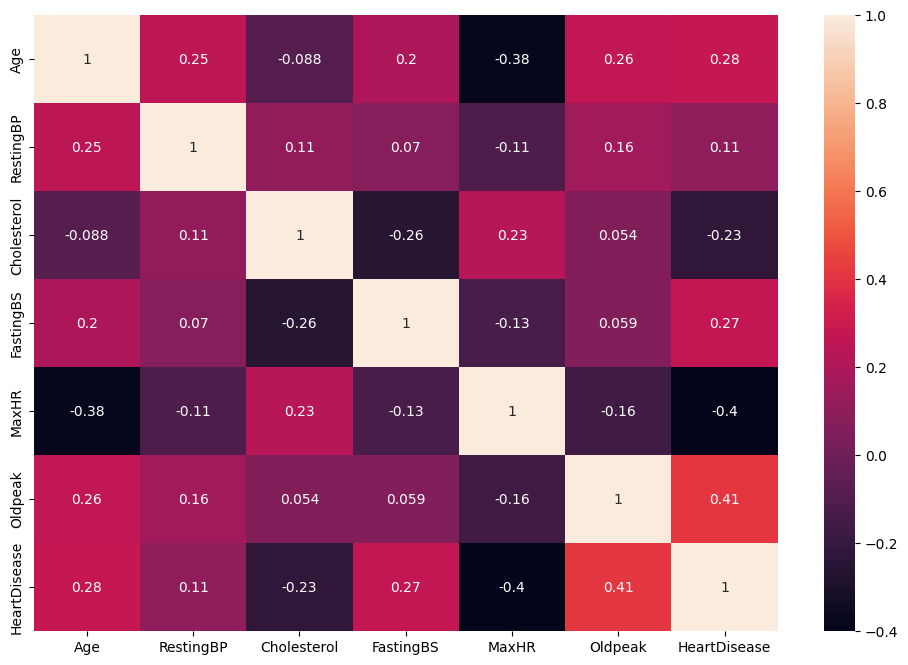

In [446]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show();

In [448]:
# Splitting the dataset into X(Feature Variable) and Y(Class Variable)
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [452]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [454]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat


In [456]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [458]:
# Apply preprocessing

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [460]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((734, 11), (184, 11), (734,), (184,))

In [465]:
# Binary columns
binary_cols = ['Sex', 'ExerciseAngina']

X_train[binary_cols] = X_train[binary_cols].replace({'M': 1, 'F': 0, 'Y': 1, 'N': 0})
X_test[binary_cols] = X_test[binary_cols].replace({'M': 1, 'F': 0, 'Y': 1, 'N': 0})


In [467]:
onehot_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[onehot_cols])

X_train_ohe = pd.DataFrame(ohe.transform(X_train[onehot_cols]), 
                           columns=ohe.get_feature_names_out(onehot_cols),
                           index=X_train.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test[onehot_cols]), 
                          columns=ohe.get_feature_names_out(onehot_cols),
                          index=X_test.index)


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [469]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
X_train_final = pd.concat([X_train[numeric_cols + binary_cols], X_train_ohe], axis=1)
X_test_final = pd.concat([X_test[numeric_cols + binary_cols], X_test_ohe], axis=1)

In [471]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


In [475]:
from collections import Counter
Counter(y_train) # Imbalanced Dataset

Counter({1: 406, 0: 328})

In [477]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_bsm,y_train_bsm=smote.fit_resample(X_train_scaled,y_train)

In [487]:
from collections import Counter
Counter(y_train_bsm) # balanced Dataset

Counter({1: 406, 0: 406})

In [489]:
np.sqrt((X_train_bsm.shape[0]/3)*2)

23.266571155486865

In [504]:
def objective(trial):
    # Suggest hyperparameters
    k = trial.suggest_int('k', 20, 40)
    w = trial.suggest_categorical('w', ['uniform', 'distance'])
    # algo = trial.suggest_categorical('algo', ['auto', 'ball_tree', 'kd_tree', 'brute'])

    # Define model
    knn = KNeighborsClassifier(n_neighbors=k, weights=w)

    # Perform cross-validation
    values = cross_validate(knn, X_train_bsm, y_train_bsm, cv=3, scoring='accuracy', return_train_score=True)
    cv_acc = values['test_score'].mean()
    train_acc = values['train_score'].mean()

    # Set additional trial attributes
    trial.set_user_attr('train_acc', train_acc)
    # trial.set_user_attr('algorithm', algo)

    return cv_acc


In [493]:
space = {
    "k": range(20, 40), 
    "w": ["uniform", "distance"],
}

In [495]:
study=optuna.create_study(direction="maximize",sampler=GridSampler(search_space=space))

[I 2025-06-14 19:23:49,688] A new study created in memory with name: no-name-7cd50c46-0f52-402e-ab15-51a2287a20a4


In [497]:
study.optimize(objective)

[I 2025-06-14 19:23:54,761] Trial 0 finished with value: 0.8632727438385496 and parameters: {'k': 31, 'w': 'uniform'}. Best is trial 0 with value: 0.8632727438385496.
[I 2025-06-14 19:23:54,971] Trial 1 finished with value: 0.8645118673408957 and parameters: {'k': 30, 'w': 'uniform'}. Best is trial 1 with value: 0.8645118673408957.
[I 2025-06-14 19:23:55,046] Trial 2 finished with value: 0.8682019042412646 and parameters: {'k': 32, 'w': 'distance'}. Best is trial 2 with value: 0.8682019042412646.
[I 2025-06-14 19:23:55,209] Trial 3 finished with value: 0.8620427315384266 and parameters: {'k': 22, 'w': 'uniform'}. Best is trial 2 with value: 0.8682019042412646.
[I 2025-06-14 19:23:55,404] Trial 4 finished with value: 0.8718873855405221 and parameters: {'k': 25, 'w': 'uniform'}. Best is trial 4 with value: 0.8718873855405221.
[I 2025-06-14 19:23:55,481] Trial 5 finished with value: 0.8718919411416337 and parameters: {'k': 27, 'w': 'distance'}. Best is trial 5 with value: 0.87189194114163

In [517]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_k,params_w,user_attrs_train_acc,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.863273,2025-06-14 19:23:54.539272,2025-06-14 19:23:54.761403,0 days 00:00:00.222131,31,uniform,0.864525,0,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
1,1,0.864512,2025-06-14 19:23:54.761403,2025-06-14 19:23:54.971054,0 days 00:00:00.209651,30,uniform,0.862061,1,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
2,2,0.868202,2025-06-14 19:23:54.971054,2025-06-14 19:23:55.046477,0 days 00:00:00.075423,32,distance,1.000000,2,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
3,3,0.862043,2025-06-14 19:23:55.046477,2025-06-14 19:23:55.209993,0 days 00:00:00.163516,22,uniform,0.867605,3,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
4,4,0.871887,2025-06-14 19:23:55.209993,2025-06-14 19:23:55.404236,0 days 00:00:00.194243,25,uniform,0.863292,4,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
5,5,0.871892,2025-06-14 19:23:55.406159,2025-06-14 19:23:55.481334,0 days 00:00:00.075175,27,distance,1.000000,5,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
6,6,0.866972,2025-06-14 19:23:55.481334,2025-06-14 19:23:55.664185,0 days 00:00:00.182851,34,uniform,0.864522,6,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
7,7,0.874361,2025-06-14 19:23:55.664185,2025-06-14 19:23:55.730102,0 days 00:00:00.065917,25,distance,1.000000,7,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
8,8,0.869432,2025-06-14 19:23:55.730102,2025-06-14 19:23:55.913474,0 days 00:00:00.183372,29,uniform,0.865139,8,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE
9,9,0.874357,2025-06-14 19:23:55.913474,2025-06-14 19:23:55.986253,0 days 00:00:00.072779,34,distance,1.000000,9,"{'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,...",COMPLETE


In [519]:
study.best_trial

FrozenTrial(number=30, state=1, values=[0.8755819780420026], datetime_start=datetime.datetime(2025, 6, 14, 19, 23, 58, 542434), datetime_complete=datetime.datetime(2025, 6, 14, 19, 23, 58, 616488), params={'k': 35, 'w': 'distance'}, user_attrs={'train_acc': 1.0}, system_attrs={'search_space': {'k': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'w': ['uniform', 'distance']}, 'grid_id': 30}, intermediate_values={}, distributions={'k': IntDistribution(high=40, log=False, low=20, step=1), 'w': CategoricalDistribution(choices=('uniform', 'distance'))}, trial_id=30, value=None)

In [521]:
best = study.best_trial

print("Best Accuracy Score:", best.value)
print("Best Hyperparameters:", best.params)
print("Training Accuracy:", best.user_attrs['train_acc'])
print("Trial Number:", best.number)


Best Accuracy Score: 0.8755819780420026
Best Hyperparameters: {'k': 35, 'w': 'distance'}
Training Accuracy: 1.0
Trial Number: 30


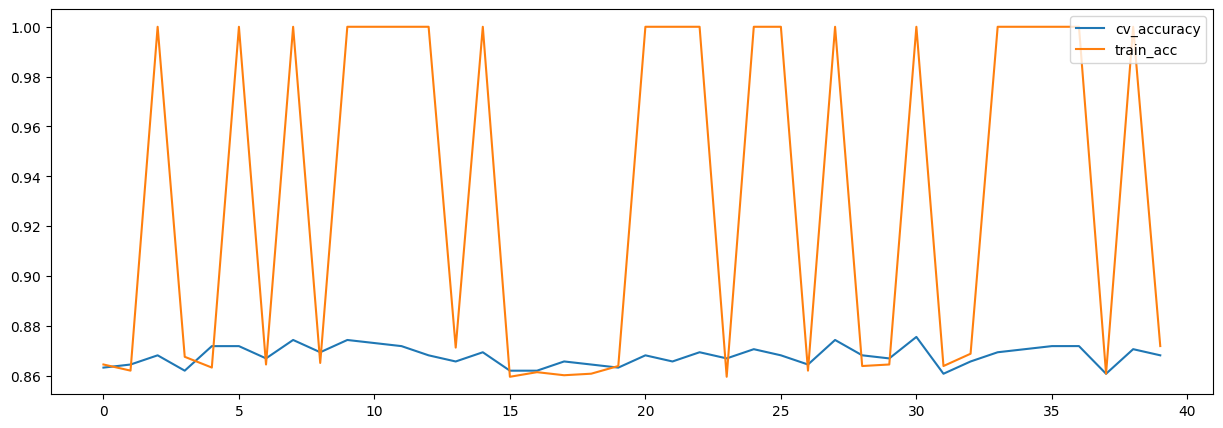

In [523]:
plt.figure(figsize=(15,5))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"],label="cv_accuracy")
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_acc"],label="train_acc")
plt.legend(loc='upper right')
plt.show();

In [525]:
study.best_value

0.8755819780420026

In [528]:
study.best_params

{'k': 35, 'w': 'distance'}

In [530]:
knn=KNeighborsClassifier(n_neighbors=35)

In [532]:
model = knn.fit(X_train_bsm, y_train_bsm)

In [534]:
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9130434782608695


In [538]:
knn = KNeighborsClassifier(n_neighbors=35)
cv_results = cross_validate(knn, X_train_bsm, y_train_bsm, cv=3, scoring='accuracy', return_train_score=True)
print("Training Accuracy Scores:", cv_results['train_score'])
print("Validation (CV) Accuracy Scores:", cv_results['test_score'])
print("Mean Training Accuracy:", cv_results['train_score'].mean())
print("Mean Validation Accuracy:", cv_results['test_score'].mean())

Training Accuracy Scores: [0.84842884 0.85212569 0.87822878]
Validation (CV) Accuracy Scores: [0.88191882 0.86715867 0.83703704]
Mean Training Accuracy: 0.8595944369794899
Mean Validation Accuracy: 0.8620381759373149


In [540]:
confusion_matrix(y_test,y_pred)

array([[75,  7],
       [ 9, 93]], dtype=int64)

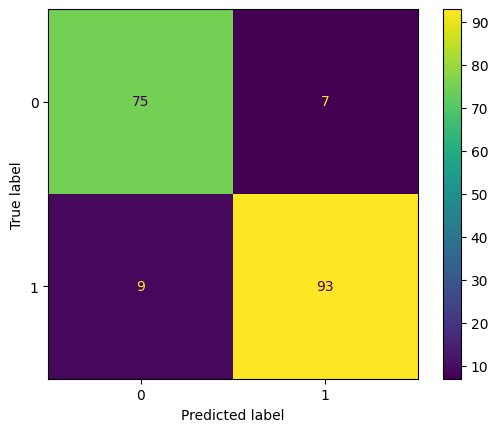

In [542]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm.plot()
plt.show();

In [544]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        82
           1       0.93      0.91      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

